##**Problem 1.1 (0 Points) Read the EXCLE CSV file “LOGITData.csv”**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving LOGITData.csv to LOGITData.csv


In [ ]:
import pandas as pd
df = pd.read_csv("LOGITData.csv")
display(df.head())
print(df.tail(), "\n")
df.shape


,Fireplaces,SalePrice,LotArea,BsmtFinSF1
0,0,208500,8450,706
1,1,181500,9600,978
2,1,223500,11250,486
3,1,140000,9550,216
4,1,250000,14260,655


      Fireplaces  SalePrice  LotArea  BsmtFinSF1
1455           1     175000     7917           0
1456           2     210000    13175         790
1457           2     266500     9042         275
1458           0     142125     9717          49
1459           0     147500     9937         830 



(1460, 4)

##**Problem 1.2 (8 Points) Produce a scatter plot using “BsmtFinSF1” and “SalePrice” and impose a loess line on the top of the data.**


Fireplaces    0
SalePrice     0
LotArea       0
BsmtFinSF1    0
dtype: int64

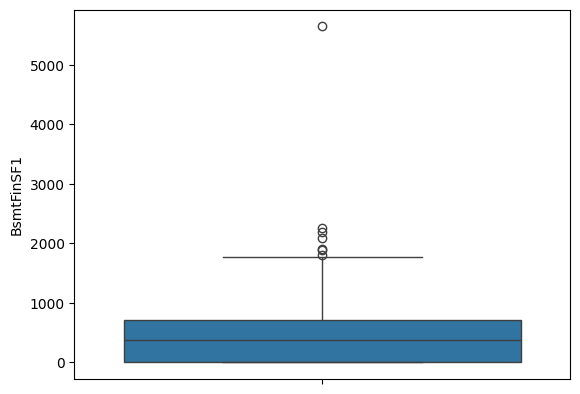

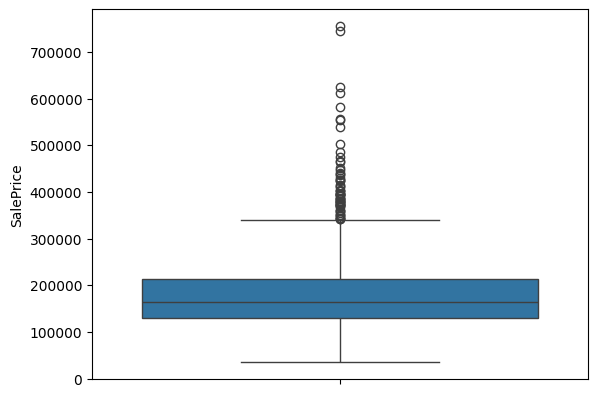

In [ ]:
#importing required libraries.
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

#check for any NAs(missing values) in dataset.
display(df.isna().sum())

#checking for any outliers.
plt.show(sns.boxplot(df['BsmtFinSF1']))
plt.show(sns.boxplot(df['SalePrice']))
#obviously, there are some outliers in both columns value.


In [ ]:
#removing outliers.
BsmtFinSF1_Q1 = df['BsmtFinSF1'].quantile(0.25)
BsmtFinSF1_Q3 = df['BsmtFinSF1'].quantile(0.75)
BsmtFinSF1_IQR = BsmtFinSF1_Q3 - BsmtFinSF1_Q1
print("BsmtFinSF1_IQR is:",BsmtFinSF1_IQR )
print("shape of df BEFORE:", df["BsmtFinSF1"].shape)

#a value is considered an outlier if it meets either one of the two conditions (less than the lower bound "OR", "|" greater than the upper bound).
df = df[~((df["BsmtFinSF1"] < (BsmtFinSF1_Q1 - 1.5 * BsmtFinSF1_IQR))) | (df["BsmtFinSF1"] > (BsmtFinSF1_Q3 + 1.5 * BsmtFinSF1_IQR))]
print("shape of df AFTER:", df["BsmtFinSF1"].shape)

BsmtFinSF1_IQR is: 712.25
shape of df BEFORE: (1460,)
shape of df AFTER: (1460,)


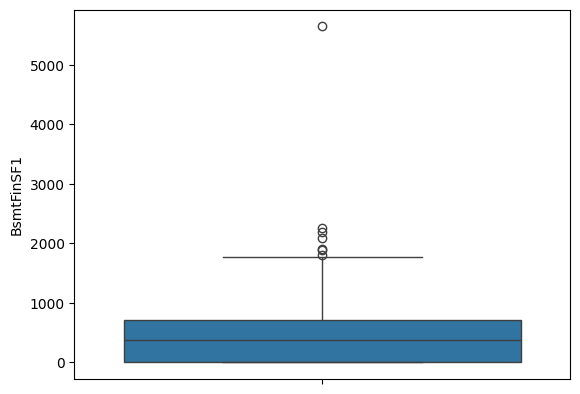

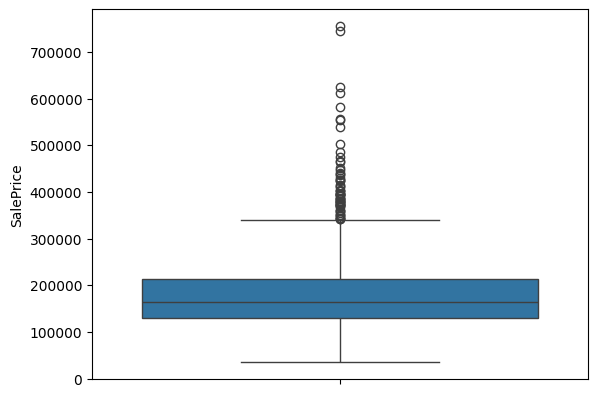

In [ ]:
#rechecking for any outliers.
plt.show(sns.boxplot(df['BsmtFinSF1']))

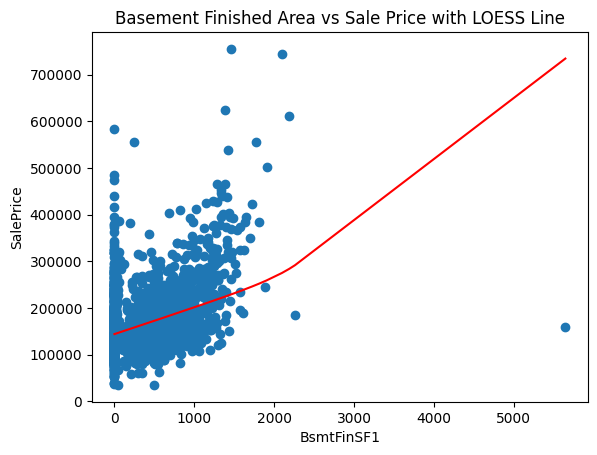

In [ ]:
df_sorted = df.sort_values(by='BsmtFinSF1')
df_sorted = df.sort_values(by="SalePrice")
plt.scatter(df["BsmtFinSF1"], df["SalePrice"])
plt.xlabel("BsmtFinSF1")
plt.ylabel("SalePrice")
loess_line = lowess(df["SalePrice"], df["BsmtFinSF1"], frac = 1)
plt.plot(loess_line[:, 0], loess_line[:, 1], color='red')
plt.title('Basement Finished Area vs Sale Price with LOESS Line')
plt.show()


##**Problem 1.3 (8 Points) Produce a scatter plot using “LotArea” and “SalePrice” and impose a loess line on the top of the data.**

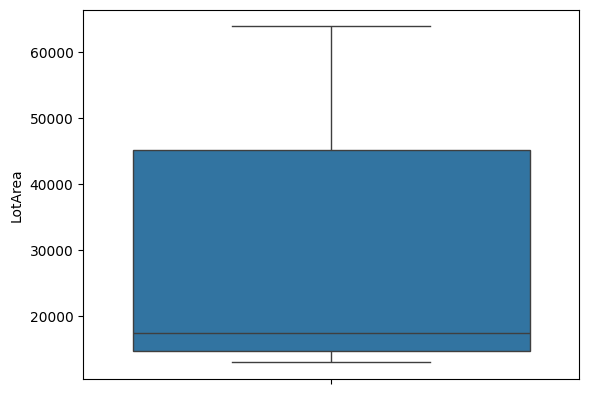

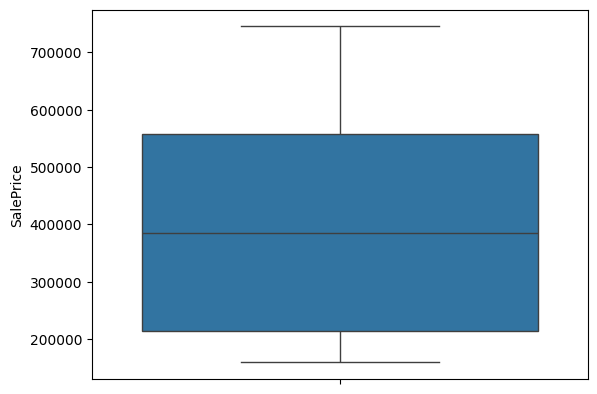

In [ ]:
#checking for any outliers.
#plt.show(sns.boxplot(df['LotArea']))
#plt.show(sns.boxplot(df['SalePrice']))
#obviously, there are some outliers in both columns value.

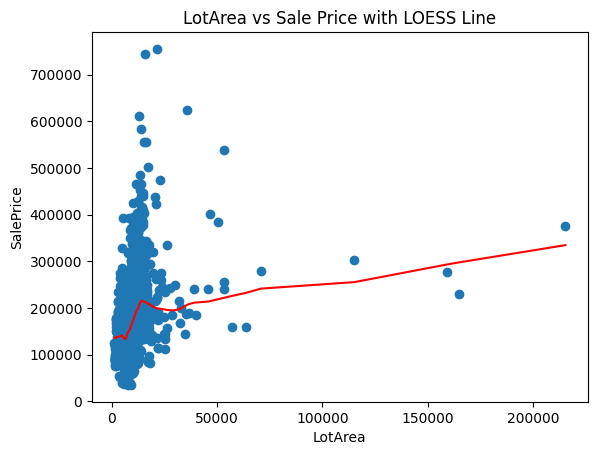

In [ ]:
plt.scatter(df["LotArea"], df["SalePrice"])
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
loess_line = lowess(df["SalePrice"], df["LotArea"], frac = 0.33)
plt.plot(loess_line[:, 0], loess_line[:, 1], color='red')
plt.title('LotArea vs Sale Price with LOESS Line')
plt.show()

##**Problem 1.4 (7 Points) Produce a table with the following summary statistic including minimum, mean, median, variance, standard deviation, maximum, and skewness for the following threevariables “SalePrice”, “BsmtFinSF1”, and “LotArea”. (Note: Display only three decimal place)**

In [ ]:
new_df = df[["SalePrice","BsmtFinSF1","LotArea"]] #creating a sub dataframe.
display(new_df)
display(type(new_df))

#calculating variance, skew, median.
variance = new_df.var()
skew = new_df.skew()
median_values = new_df.median()

#adding the above values to the summary dataframe as index.
summary_df = new_df.describe()
summary_df.loc["variance"] = variance
summary_df.loc["skew"] = skew
summary_df.loc["median"] = median_values
print(summary_df,"\n")


#truncating to 3 decimal numbers.
summary_rounded = summary_df.round(3)
# it doesnt work
print(summary_rounded)

,SalePrice,BsmtFinSF1,LotArea
0,208500,706,8450
1,181500,978,9600
2,223500,486,11250
3,140000,216,9550
4,250000,655,14260
...,...,...,...
1455,175000,0,7917
1456,210000,790,13175
1457,266500,275,9042
1458,142125,49,9717


pandas.core.frame.DataFrame

             SalePrice     BsmtFinSF1       LotArea
count     1.460000e+03    1460.000000  1.460000e+03
mean      1.809212e+05     443.639726  1.051683e+04
std       7.944250e+04     456.098091  9.981265e+03
min       3.490000e+04       0.000000  1.300000e+03
25%       1.299750e+05       0.000000  7.553500e+03
50%       1.630000e+05     383.500000  9.478500e+03
75%       2.140000e+05     712.250000  1.160150e+04
max       7.550000e+05    5644.000000  2.152450e+05
variance  6.311111e+09  208025.468469  9.962565e+07
skew      1.882876e+00       1.685503  1.220769e+01
median    1.630000e+05     383.500000  9.478500e+03 

             SalePrice  BsmtFinSF1       LotArea
count     1.460000e+03    1460.000  1.460000e+03
mean      1.809212e+05     443.640  1.051683e+04
std       7.944250e+04     456.098  9.981265e+03
min       3.490000e+04       0.000  1.300000e+03
25%       1.299750e+05       0.000  7.553500e+03
50%       1.630000e+05     383.500  9.478500e+03
75%       2.140000e+05     712.

##**Problem 1.5 (7 Points) Obtain both the Spearman correlation and the Pearson correlation between the following variables “SalePrice”, “BsmtFinSF1”, and “LotArea”.**

In [ ]:
#Pearson corrrelation.
print(new_df.corr(method='pearson'), "\n")

#Spearman correlation.
print(new_df.corr(method='spearman'))




            SalePrice  BsmtFinSF1   LotArea
SalePrice    1.000000    0.386420  0.263843
BsmtFinSF1   0.386420    1.000000  0.214103
LotArea      0.263843    0.214103  1.000000 

            SalePrice  BsmtFinSF1   LotArea
SalePrice    1.000000    0.301871  0.456461
BsmtFinSF1   0.301871    1.000000  0.171995
LotArea      0.456461    0.171995  1.000000
